In [ ]:
!pip install clip-retrieval img2dataset

In [2]:
!echo 'https://placekitten.com/200/305' >> myimglist.txt
!echo 'https://placekitten.com/200/304' >> myimglist.txt
!echo 'https://placekitten.com/200/303' >> myimglist.txt

In [3]:
!img2dataset --url_list=myimglist.txt --output_folder=image_folder --thread_count=64 --image_size=256

100% 1/1 [00:01<00:00,  1.22s/it]


In [4]:
!clip-retrieval batch  --dataset_path image_folder --output_folder indice_folder

100%|████████████████████████████████████████| 354M/354M [00:02<00:00, 139MiB/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100% 1/1 [00:00<00:00,  1.03it/s]


In [5]:
!ls -R indice_folder

indice_folder:
image.index  image_list  img_emb.npy


In [11]:
!clip-retrieval filter --query "cat" --output_folder "cat/" --indice_folder "indice_folder"

Found 100 items with query 'cat'
The minimum distance is -340282346638528859811704183484516925440.00 and the maximum is 0.26
You may want to use these numbers to increase your --num_results parameter. Or use the --threshold parameter.
Copying the images in cat/


In [12]:
!ls

cat  image_folder  indice_folder  myimglist.txt  sample_data


In [13]:
ls -R cat

cat:
000000000.jpg  000000001.jpg  000000002.jpg


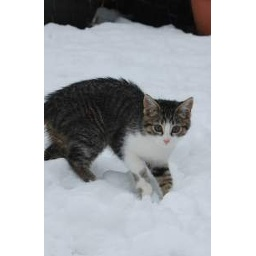

In [14]:
from IPython.display import Image
Image(filename='cat/000000000.jpg') 